In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
df = pd.read_csv("housing.csv")
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [3]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_ocean = ohe.fit_transform(df[['ocean_proximity']]).toarray()
ohe_ocean

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [4]:
import numpy as np
ohe_labels = np.array(['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'])

In [5]:
df_final = pd.DataFrame(ohe_ocean, columns = ohe_labels)
df_final = pd.concat([df,df_final], axis=1)
df_final = df_final.drop(['ocean_proximity'], axis=1)
df_final.total_bedrooms = df_final.total_bedrooms.fillna(df_final.total_bedrooms.median())

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  float64
 10  INLAND              20640 non-null  float64
 11  NEAR OCEAN          20640 non-null  float64
 12  NEAR BAY            20640 non-null  float64
 13  ISLAND              20640 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB



## Elbow Method
##### Find optimum number of cluster

In [7]:
inertia = [] #SUM OF SQUARED ERROR
for k in range(1,21):
    km = KMeans(n_clusters=k, n_init=10)
    
    km.fit(df_final)
    inertia.append(km.inertia_)

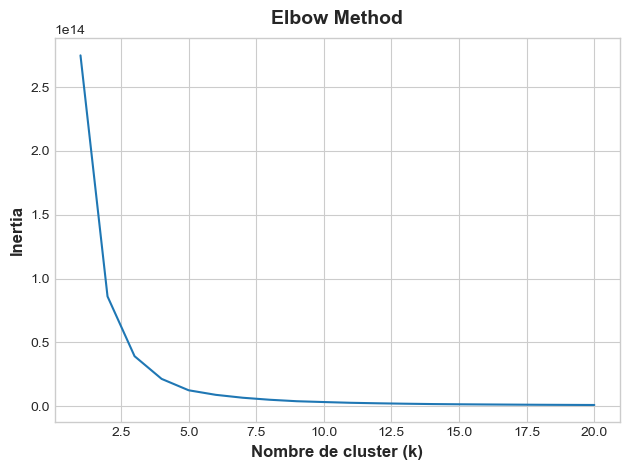

In [8]:
g=sns.lineplot(x=range(1,21), y=inertia)

g.set(xlabel ="Nombre de cluster (k)", ylabel = "Inertia", title ='Elbow Method')

plt.show()

In [9]:
# from sklearn.cluster import KElbowVisualizer
# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,21))

# visualizer.fit(df_final)        # Fit the data to the visualizer
# visualizer.show()  

In [10]:
kmeans = KMeans(n_clusters=3,n_init=10)

df_final["Cluster"] = kmeans.fit_predict(df_final)
#X["Cluster"] = X["Cluster"].astype("category")

df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND,Cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,1


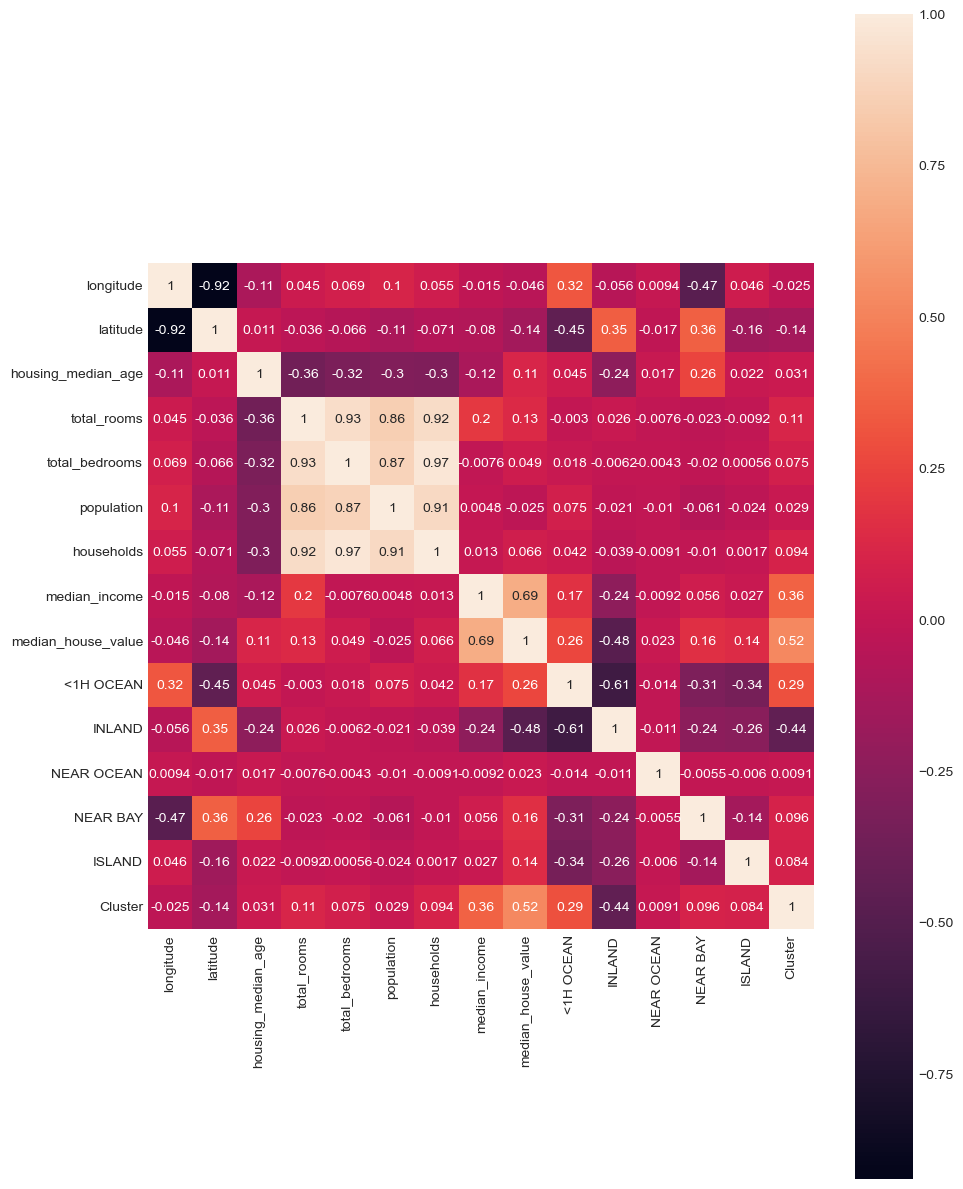

In [11]:
correlation = df_final.corr()
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(correlation, square=True, annot=True)
plt.show()

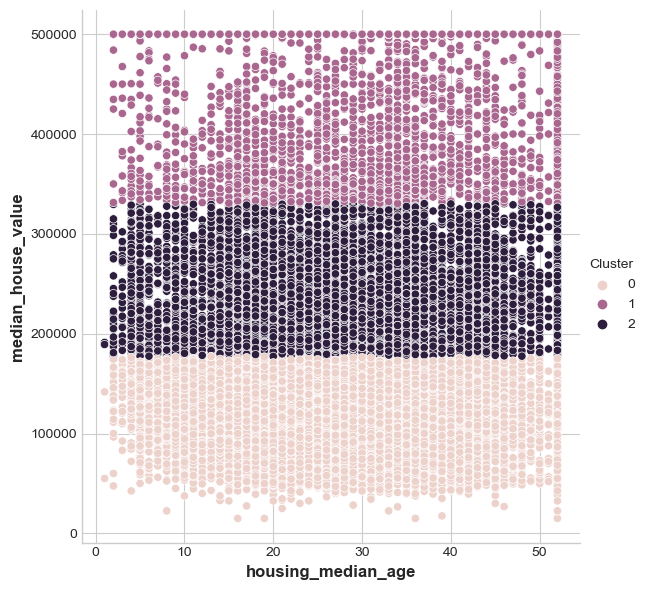

In [12]:
sns.relplot(x="housing_median_age", y="median_house_value", hue="Cluster", data=df_final, height=6)
plt.show()

In [13]:
# %matplotlib tk
# sns.relplot(x="total_bedrooms", y="total_rooms", hue="Cluster", data=df_final, height=6)
# plt.show()

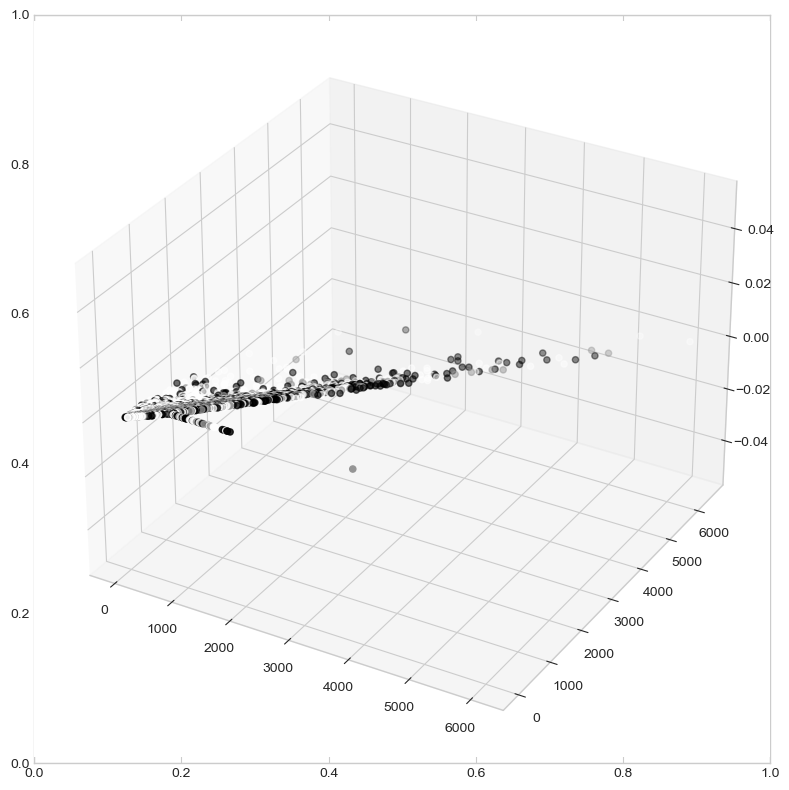

In [16]:

fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(df_final.households,df_final.total_bedrooms, c=df_final.Cluster)
plt.show()